In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [46]:
df['Cancer Present'].value_counts()

0    1500
1    1500
Name: Cancer Present, dtype: int64

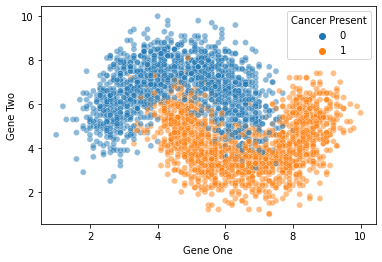

In [17]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',
                hue='Cancer Present',alpha = 0.5);

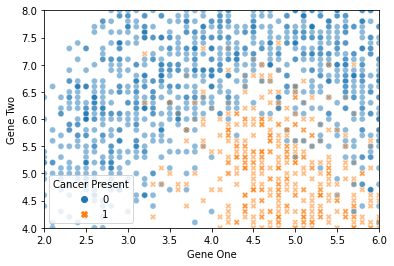

In [16]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',
                hue='Cancer Present',alpha = 0.5,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8);

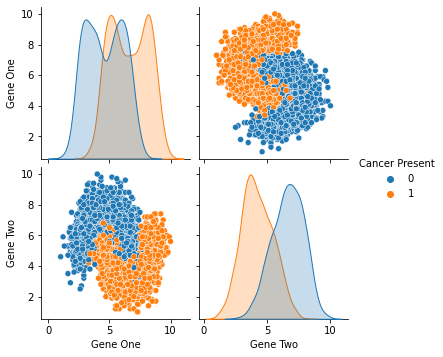

In [15]:
sns.pairplot(data=df, hue='Cancer Present');

### **train | test split**

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### **Scaling the data**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaled_X_train = scaler.fit_transform(X_train)

In [27]:
scaled_X_test = scaler.transform(X_test)

### **KNN Classifier**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_pred = knn_model.predict(scaled_X_test)

### **Evaluating the model**

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



### **Looking for the best k value**

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

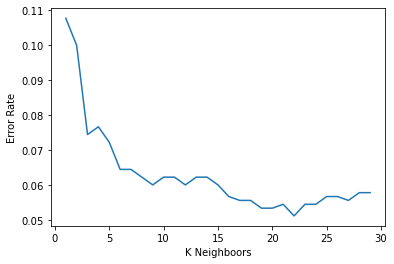

In [51]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighboors');